In [1]:
import numpy as np
import os

In [2]:
mouse_id = "23964-4-22"
os.system(f"mkdir -p {mouse_id}/data/responses_test/")
os.system(f"mkdir -p {mouse_id}/data/images_test/")

0

In [13]:
tiers = np.load(f"{mouse_id}/meta/trials/tiers.npy")
test_ids = np.where(tiers == "test")[0]

frame_image_id = np.load(f"{mouse_id}/meta/trials/frame_image_id.npy")
test_frame_image_ids = frame_image_id[np.where(tiers == "test")]

In [14]:
image = None
frame = None
signals = []
s = np.load(os.path.join(f"{mouse_id}/meta/statistics/responses/all/std.npy"))
threshold = 0.01 * s.mean()
idx = s > threshold
response_precision = np.ones_like(s) / threshold
response_precision[idx] = 1 / s[idx]

for image_id, frame_id in zip(test_ids, test_frame_image_ids):
    cur_image = np.load(f"{mouse_id}/data/images/{image_id}.npy")
    cur_frame = frame_id

    if frame is None or cur_frame == frame:
        assert image is None or (image == cur_image).all()
        image = cur_image
        frame = cur_frame
        signals.append(np.load(f"{mouse_id}/data/responses/{image_id}.npy") * response_precision)
    else:
        assert image is not None and not (image == cur_image).all()
        signals = np.array(signals).mean(axis=0)
        # print(signals.shape)
        np.save(f"{mouse_id}/data/responses_test/{frame_id}.npy", signals)
        np.save(f"{mouse_id}/data/images_test/{frame_id}.npy", image)
        signals = []
        image = cur_image
        frame = cur_frame

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

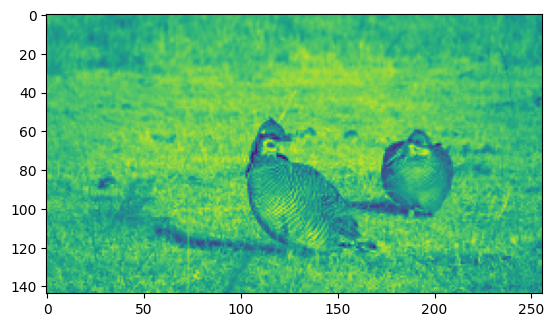

In [7]:
image = np.load("22846-10-16/data/images_test/104.npy")
plt.imshow(np.transpose(image, (1, 2, 0)))